In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [3]:
#loading data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
        print(f"Column :{column}, Unique Values : {df[column].unique()}")

Column :customerID, Unique Values : [5375 3962 2564 ... 3367 5934 2226]
Column :gender, Unique Values : [0 1]
Column :Partner, Unique Values : [1 0]
Column :Dependents, Unique Values : [0 1]
Column :PhoneService, Unique Values : [0 1]
Column :MultipleLines, Unique Values : [1 0 2]
Column :InternetService, Unique Values : [0 1 2]
Column :OnlineSecurity, Unique Values : [0 2 1]
Column :OnlineBackup, Unique Values : [2 0 1]
Column :DeviceProtection, Unique Values : [0 2 1]
Column :TechSupport, Unique Values : [0 2 1]
Column :StreamingTV, Unique Values : [0 2 1]
Column :StreamingMovies, Unique Values : [0 2 1]
Column :Contract, Unique Values : [0 1 2]
Column :PaperlessBilling, Unique Values : [1 0]
Column :PaymentMethod, Unique Values : [2 3 0 1]
Column :TotalCharges, Unique Values : [2505 1466  157 ... 2994 2660 5407]
Column :Churn, Unique Values : [0 1]


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


# Visualization

In [9]:
# Convert categorical variables if necessary
df['Churn'] = df['Churn'].astype(str)  # Ensure Churn is treated as categorical

def plot_distribution(col, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='Churn', palette='coolwarm')
    plt.title(title)
    plt.show()

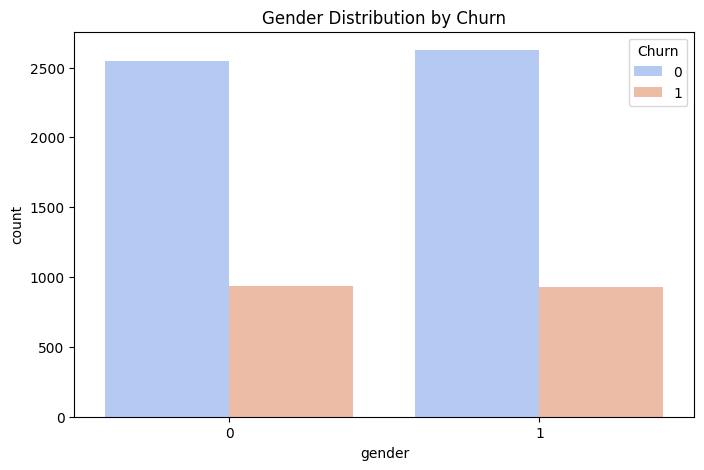

In [10]:
plot_distribution('gender', "Gender Distribution by Churn")


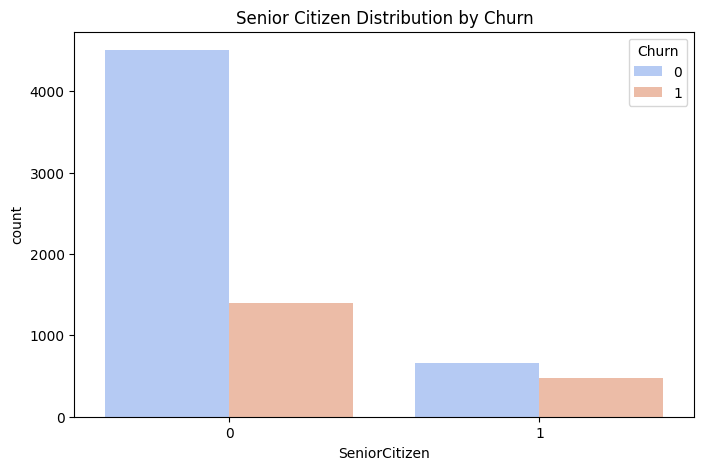

In [11]:
plot_distribution('SeniorCitizen', "Senior Citizen Distribution by Churn")

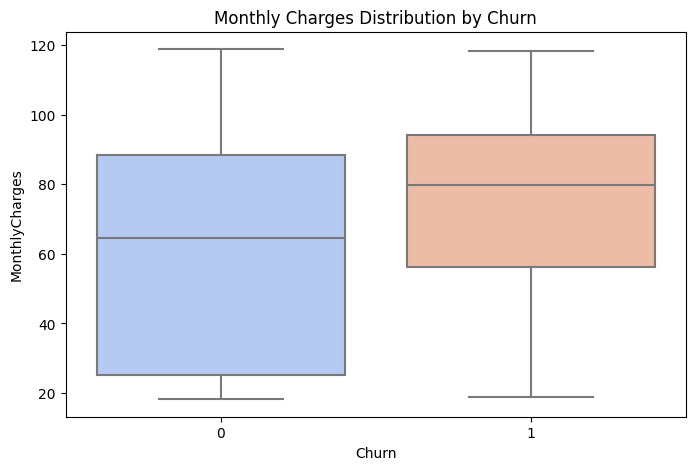

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title("Monthly Charges Distribution by Churn")
plt.show()

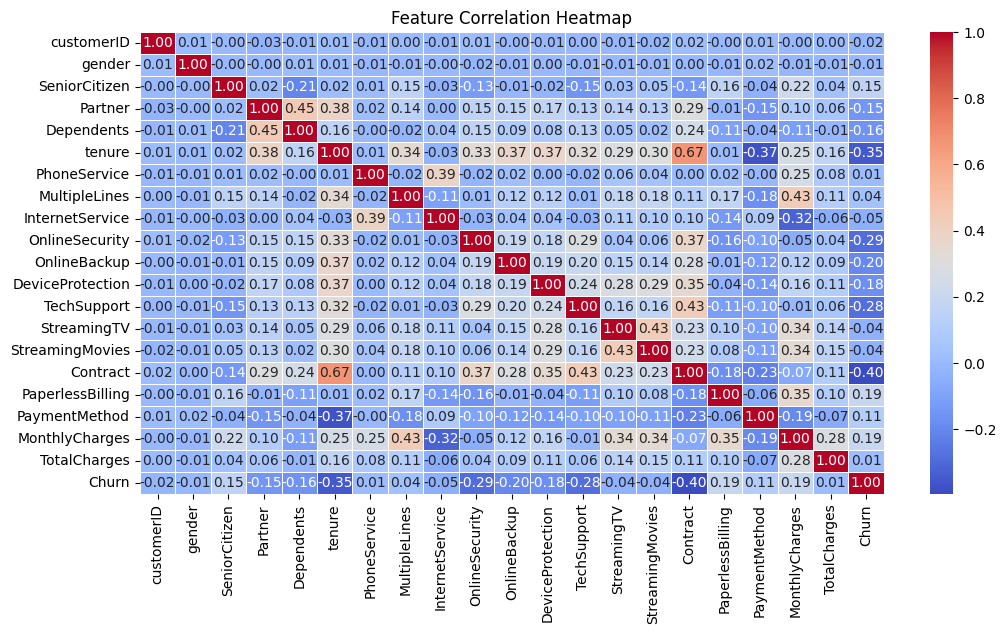

In [13]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


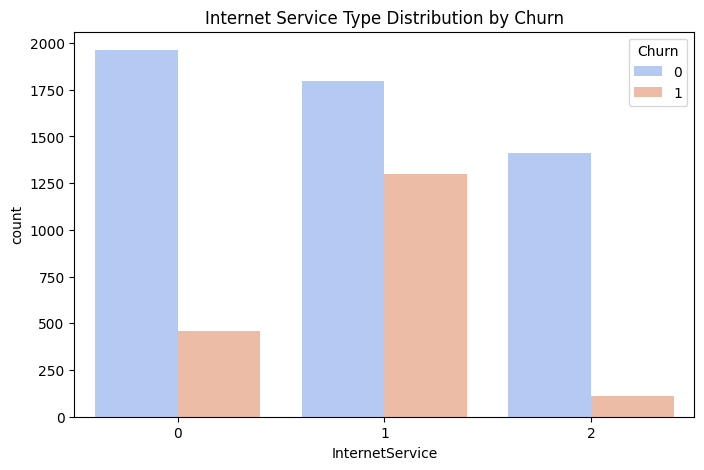

In [14]:
plot_distribution('InternetService', "Internet Service Type Distribution by Churn")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

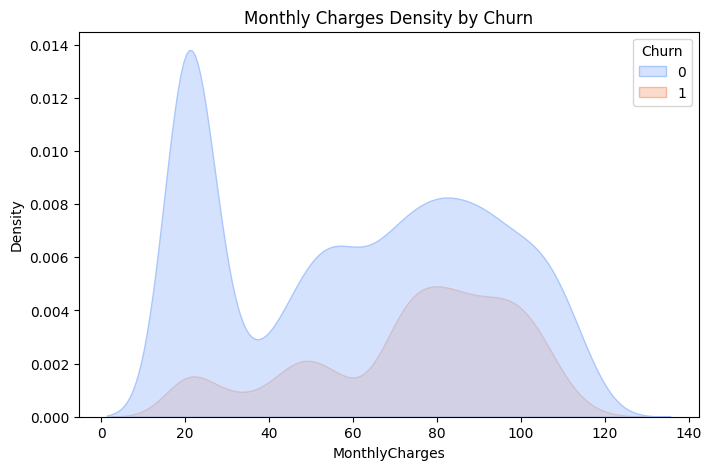

In [15]:
# KDE plot for Monthly Charges
def plot_kde(col, title):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette='coolwarm', alpha=0.5)
    plt.title(title)
    plt.show()

plot_kde('MonthlyCharges', "Monthly Charges Density by Churn")


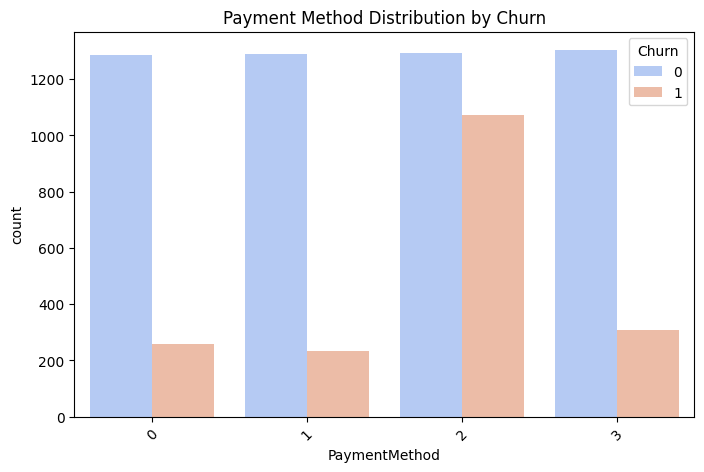

In [16]:
# Count plot for Payment Method
def plot_count(col, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_count('PaymentMethod', "Payment Method Distribution by Churn")

In [17]:
df.drop("customerID" , axis=1, inplace=True)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# RANDOM FOREST 

* Definition: Random Forest is an ensemble method that works by creating and combining multiple decision trees. Each tree is trained on a randomly selected subset of data, and the results are combined (through voting or averaging).

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
x= df.drop("Churn" , axis=1)
y= df["Churn"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
random = RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7984

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# NAIVE BAYES

* Definition: Naive Bayes is a classification algorithm based on Bayes' theorem, commonly used for classification problems. Naive Bayes assumes that all features are independent of each other (naive = simplistic).

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred_nb = nb_model.predict(X_test)

In [27]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7587

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



# ADA BOOST

* Definition: AdaBoost (Adaptive Boosting) is an ensemble method that trains weak learners (typically simple models) sequentially and attempts to correct errors. AdaBoost tries to minimize the errors of each model and ultimately combines the decisions of multiple models.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
base_model = DecisionTreeClassifier(max_depth=1) 
ada_boost = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)


In [30]:
ada_boost.fit(X_train, y_train)


y_pred = ada_boost.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8055


## ANN MODEL

In [32]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.initializers import HeUniform


# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [35]:
from keras.utils import to_categorical

y_train =to_categorical(y_train,2)
y_test = to_categorical(y_test , 2)


In [36]:
from keras.regularizers import l2


ann_model = Sequential([
    Dense(512, activation="relu", kernel_initializer="he_uniform", 
          kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]),
          Dropout(0.2),
          BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer="he_uniform",
          kernel_regularizer=l2(0.01)),
    Dense(128, activation="relu", kernel_initializer="he_uniform",
          kernel_regularizer=l2(0.01)),
                    Dropout(0.2),
          BatchNormalization(),
    Dense(2, activation="softmax")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
ann_model.compile(optimizer=Adam(learning_rate=0.0001) , loss="binary_crossentropy" , metrics=["accuracy"])

In [38]:
fit = ann_model.fit(scaler_X_train , y_train , epochs=100 , batch_size=128 , validation_data=(scaler_X_test, y_test ) , validation_split=0.2 )

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5824 - loss: 18.6101 - val_accuracy: 0.7608 - val_loss: 17.8651
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6653 - loss: 17.8870 - val_accuracy: 0.7488 - val_loss: 17.2829
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6848 - loss: 17.2555 - val_accuracy: 0.7253 - val_loss: 16.7254
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7073 - loss: 16.6838 - val_accuracy: 0.7182 - val_loss: 16.2452
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7128 - loss: 16.1770 - val_accuracy: 0.7239 - val_loss: 15.7695
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7111 - loss: 15.7068 - val_accuracy: 0.7324 - val_loss: 15.3097
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7175 - loss: 15.2321 - val_accuracy: 0.7438 - val_loss: 14.8653
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7404 - loss: 14.7871 - val_acc

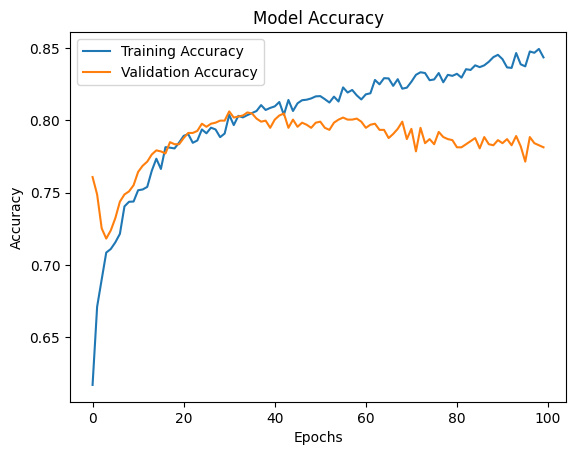

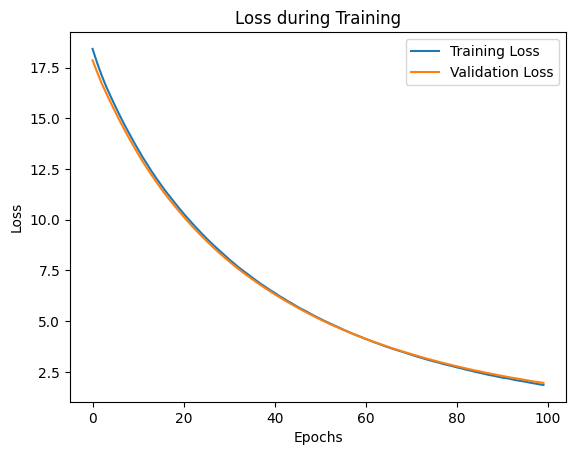

In [39]:

plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')  # Corrected this line
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')  # Corrected this line
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
pred = ann_model.predict(scaler_X_test)

y_class = y_test.argmax(axis=1)
predict = pred.argmax(axis=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [41]:
print(classification_report(y_class, predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.51      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



#### That's why I love Ann...